In [1]:
import csv
import pandas as pd
from load_clean_review import load_and_clean_reviews

PATH = "data/Digital_Video.tsv"

df = load_and_clean_reviews(PATH)

In [4]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month
0,US,12190288,R3FU16928EP5TC,B00AYB1482,668895143,Enlightened: Season 1,Digital_Video_Download,5,0,0,False,True,I loved it and I wish there was a season 3,I loved it and I wish there was a season 3... ...,2015-08-31,2015.0,8.0
1,US,30549954,R1IZHHS1MH3AQ4,B00KQD28OM,246219280,Vicious,Digital_Video_Download,5,0,0,False,True,As always it seems that the best shows come fr...,As always it seems that the best shows come fr...,2015-08-31,2015.0,8.0
2,US,52895410,R52R85WC6TIAH,B01489L5LQ,534732318,After Words,Digital_Video_Download,4,17,18,False,True,Charming movie,"This movie isn't perfect, but it gets a lot of...",2015-08-31,2015.0,8.0
3,US,27072354,R7HOOYTVIB0DS,B008LOVIIK,239012694,Masterpiece: Inspector Lewis Season 5,Digital_Video_Download,5,0,0,False,True,Five Stars,excellant this is what tv should be,2015-08-31,2015.0,8.0
4,US,26939022,R1XQ2N5CDOZGNX,B0094LZMT0,535858974,On The Waterfront,Digital_Video_Download,5,0,0,False,True,Brilliant film from beginning to end,Brilliant film from beginning to end. All of t...,2015-08-31,2015.0,8.0


In [6]:
min_date = df["review_date"].min()
max_date = df["review_date"].max()

print("Earliest review:", min_date)
print("Latest review:", max_date)



# Extract year and month as separate columns
df["year"] = df["review_date"].dt.year
df["month"] = df["review_date"].dt.month

# Group by year and collect unique months
months_per_year = df.groupby("year")["month"].unique()

print(months_per_year)

print(months_per_year.loc[2012.0])

Earliest review: 2000-10-04 00:00:00
Latest review: 2015-08-31 00:00:00
year
2000.0                                               [10.0]
2001.0                                                [6.0]
2002.0                           [12.0, 7.0, 5.0, 4.0, 3.0]
2003.0                                [12.0, 9.0, 6.0, 3.0]
2004.0                               [11.0, 10.0, 9.0, 3.0]
2005.0                    [12.0, 11.0, 10.0, 8.0, 7.0, 6.0]
2006.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 4.0, 3.0, 2....
2007.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2008.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2009.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2010.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2011.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2012.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2013.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2014.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2015.0             [8.0

In [7]:

df_2012 = df[df["review_date"].dt.year == 2012].copy()

df_2012


df_2012["review_length"] = df_2012["review_body"].fillna("").str.split().str.len()
df_2012 = df_2012[df_2012["review_length"] > 0]

df_2012["length_bin"] = pd.qcut(
    df_2012["review_length"], q=3, labels=["short", "medium", "long"], duplicates="drop"
)

df_2012

target_n = 4000
labels = ["short", "medium", "long"]

per = target_n // len(labels)   # base quota per bucket (≈ 1333)
rem = target_n - per * len(labels)   # leftover rows to distribute


parts = []
for i, label in enumerate(labels):
    want = per + (1 if i < rem else 0)  # bucket-specific quota
    have = (df_2012["length_bin"] == label).sum()  # how many rows exist in that bucket
    take = min(want, have)  # don’t over-ask if bucket is too small
    if take > 0:
        parts.append(
            df_2012[df_2012["length_bin"] == label].sample(n=take, random_state=42)
        )

sampled_df = pd.concat(parts)

sampled_df

shuffled_df = (
    sampled_df
      .sample(frac=1, random_state=42)  
      .reset_index(drop=True)          
)

shuffled_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month,review_length,length_bin
0,US,13516722,R941PGJCNFLW5,B00AMBLXP8,405971410,Ted,Digital_Video_Download,5,0,1,False,False,great,"Funny, funny, funny, funny, funny, funny, funn...",2012-12-27,2012.0,12.0,20,short
1,US,36961161,R1P6056R81ZJND,B008JAG9O4,171877417,The Flowers Of War,Digital_Video_Download,5,2,4,False,True,Great movie,I was pleasantly surprised at how much my 17 y...,2012-10-29,2012.0,10.0,105,long
2,US,31788141,R1YWWAIJ4ZFZDV,B007Z9QA8K,463101661,New Year's Eve,Digital_Video_Download,4,1,1,False,True,Great girls night move,Enjoyed this with girls 30 to 74.....it was so...,2012-09-07,2012.0,9.0,20,short
3,US,49154612,R33L3M6VYZURXZ,B009814AP8,491094930,Dinosaurs on a Spaceship,Digital_Video_Download,5,4,4,False,True,Dinosaurs on a Spaceship,(Warning: This review may contain spoilers if ...,2012-09-10,2012.0,9.0,297,long
4,US,22073263,R1M0JZ2ZMAN5ZY,B00130Y2U0,552289092,Tommy Hawk,Digital_Video_Download,5,1,1,False,False,"""You're watching TOMMY HAWK !!!""",Reno 911! is a hilarious mockumentary-style sp...,2012-07-23,2012.0,7.0,385,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,US,45403392,RWKG84RR7ZJCE,B000YMM3CC,653409458,The Notebook,Digital_Video_Download,5,0,0,False,True,Powerful love story!,This is a powerful love story with beautiful s...,2012-11-29,2012.0,11.0,27,short
3996,US,48294183,R3MOYDE3N5GX8H,B00APUYWYA,663935341,Pitch Perfect,Digital_Video_Download,5,0,1,False,True,"If you love music, you will love this movie","Nope, not a teenager so the love portion of th...",2012-12-27,2012.0,12.0,22,short
3997,US,17886204,R1DULS2WM7MRP0,B003ZFCBJ0,250482109,The Last Song,Digital_Video_Download,5,0,0,False,True,loved it!!!,i loved the book!!!! even though i love the mo...,2012-10-01,2012.0,10.0,23,short
3998,US,25593565,R3UX4D5YE20PRP,B001BOIW6I,237875869,Treading Water,Digital_Video_Download,5,2,2,False,True,Quite enjoyable!,I think that this movie is a true depiction of...,2012-09-12,2012.0,9.0,74,long


In [8]:
# Recreate qcut but keep the Interval objects
bins = pd.qcut(df_2012["review_length"], q=3, duplicates="drop")

# Look at unique intervals
print(bins.cat.categories)

IntervalIndex([(0.999, 28.0], (28.0, 55.0], (55.0, 6689.0]], dtype='interval[float64, right]')


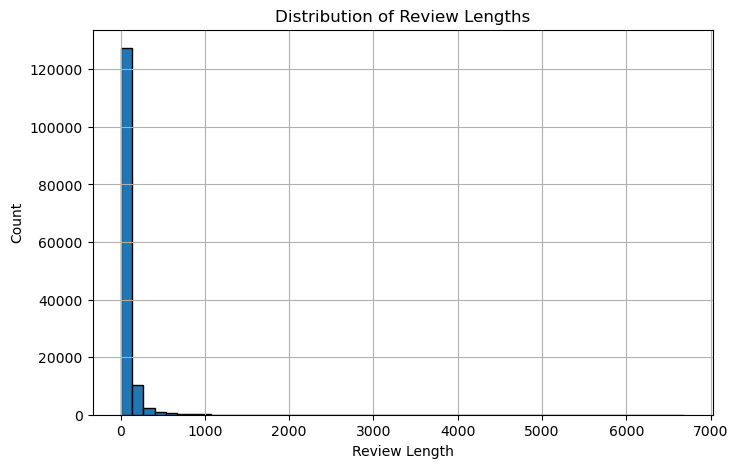

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df_2012["review_length"].hist(bins=50, edgecolor="black")
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.title("Distribution of Review Lengths")
plt.show()

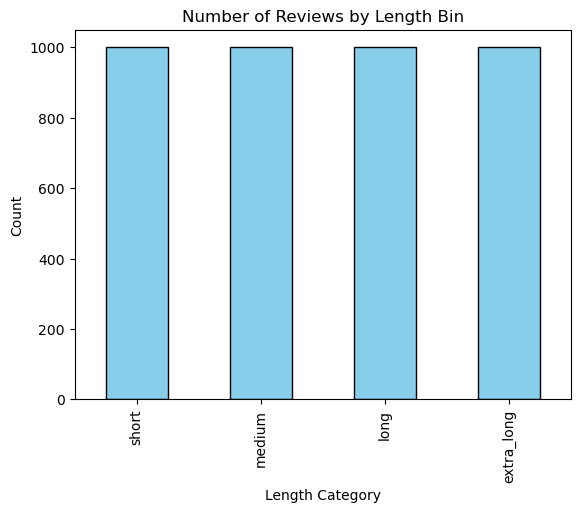

In [13]:
df_2012["length_bin"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Length Category")
plt.ylabel("Count")
plt.title("Number of Reviews by Length Bin")
plt.show()

In [11]:
from month_bin_shuffle import add_length_info, stratified_sample_by_month_and_bin

df_2012 = df[df["review_date"].dt.year == 2012].copy()

df_2012 = add_length_info(df_2012)
df_2012 = stratified_sample_by_month_and_bin(df_2012, target_n=4000)

df_2012


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month,review_length,length_bin
0,US,11671855,R12BLPUIFK6U16,B006W0QOF2,751283357,Drive,Digital_Video_Download,5,3,7,False,False,Some of these reviews are making me lose faith...,I cant believe these people giving the movie a...,2012-02-12,2012.0,2012-02,278,long
1,US,44783857,R2YDNWXLAB2TPN,B002N4QCTE,124129818,Burning Plain,Digital_Video_Download,5,3,3,False,False,Just watch the movie...,I've read several of the reviews and some are ...,2012-11-04,2012.0,2012-11,102,medium
2,US,26257896,R3QFB0SEIMCQUZ,B001M432X0,574015145,Gidget,Digital_Video_Download,1,5,8,False,False,"No Widescreen, No Order of This Fifties Classic!",It's a disgrace that so many classic films rem...,2012-02-27,2012.0,2012-02,339,long
3,US,17971549,R35GOPPQJUM7DB,B000LY94N4,598518363,One Flew Over The Cuckoo's Nest,Digital_Video_Download,5,1,1,False,False,A true classic,I had the pleasure of finally watching this cl...,2012-12-29,2012.0,2012-12,772,extra_long
4,US,10213463,R2DM17DMP1NH34,B005T0YECG,188185271,The Presence,Digital_Video_Download,3,2,2,False,True,A classic-style ghost story with some plot holes,I like Mira Sorvino. She's the rare modern-day...,2012-09-09,2012.0,2012-09,975,extra_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,US,43710793,R32BRY2CHLHZ73,B000I9W2HW,14697608,The Gift,Digital_Video_Download,5,0,0,False,True,Great supernatural thriller,This is my favorite Cate Blanchett movie. She ...,2012-04-12,2012.0,2012-04,88,medium
3996,US,21813359,R1DQF0N65POPYD,B007OUFESC,695809183,A Dangerous Method,Digital_Video_Download,4,2,3,False,True,"""Hanging by a thread""",I think this film was rather kind to the splin...,2012-04-13,2012.0,2012-04,978,extra_long
3997,US,50877383,R3EWIL8Q22OK0G,B007A1QK2E,993175523,Pilot,Digital_Video_Download,1,0,10,False,False,Fantastic Concept -- Dead (So Far) On Arrival!,The first episode of any new series has the un...,2012-03-03,2012.0,2012-03,201,long
3998,US,22075672,R125524TAQMUIH,B004OWXE6C,614424321,Burlesque Massacre,Digital_Video_Download,2,1,3,False,True,Not that much burlesque nor massacre,So my fiance and I have seen a lot of horror m...,2012-11-21,2012.0,2012-11,259,long


In [12]:
LENGTH_BINS = [0, 50, 200, 500, float("inf")]
LENGTH_LABELS = ["short", "medium", "long", "extra_long"]
# --- Check bin ranges ---
for label, (low, high) in zip(LENGTH_LABELS, zip(LENGTH_BINS[:-1], LENGTH_BINS[1:])):
    upper = int(high) if high != float("inf") else "∞"
    print(f"{label:>10}: {low+1} – {upper} words")

# --- Count per (month × length_bin) ---
counts = df_2012.groupby(["month", "length_bin"]).size().unstack(fill_value=0)

print("\nCounts per (month × length_bin):")
print(counts)

# optional: quick totals per bin
print("\nTotals per bin:")
print(counts.sum(axis=0))

# optional: quick totals per month
print("\nTotals per month:")
print(counts.sum(axis=1))

     short: 1 – 50 words
    medium: 51 – 200 words
      long: 201 – 500 words
extra_long: 501 – ∞ words

Counts per (month × length_bin):
length_bin  short  medium  long  extra_long
month                                      
2012-01        84      84    84          84
2012-02        84      84    84          84
2012-03        84      84    84          84
2012-04        84      84    84          84
2012-05        83      83    83          83
2012-06        83      83    83          83
2012-07        83      83    83          83
2012-08        83      83    83          83
2012-09        83      83    83          83
2012-10        83      83    83          83
2012-11        83      83    83          83
2012-12        83      83    83          83

Totals per bin:
length_bin
short         1000
medium        1000
long          1000
extra_long    1000
dtype: int64

Totals per month:
month
2012-01    336
2012-02    336
2012-03    336
2012-04    336
2012-05    332
2012-06    332
2012-07    3

/var/folders/zm/pz0q6_fn2zv0lr2bzbh6_8mc0000gn/T/ipykernel_23170/1777719214.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_2012.groupby(["month", "length_bin"]).size().unstack(fill_value=0)


In [14]:
df_2012.to_csv("video_2012.csv", index=False)